In [7]:
import numpy as np
import pandas as pd
import math  
from sklearn.metrics import r2_score,mean_squared_error
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

In [8]:
df = pd.read_csv('dmf.csv')
df1 = df.copy(deep=True)
df1['flor_1'] = df1.flor * df1.flor
df2 = df1.copy(deep=True)
np.seterr(divide='ignore')
df2['1/sqrt_flor'] = 1/(np.sqrt(np.array(df2['flor'])))
df_train,df_test = train_test_split(df, test_size=0.2)
df1_train,df1_test = train_test_split(df1, test_size=0.3)
df2_train,df2_test = train_test_split(df2, test_size=0.3)

In [10]:
clf = LinearRegression(normalize=True)
X = df_train['flor']
X = np.array(X).reshape(-1,1)
y = df_train['dmf']
X_T = df_test['flor']
X_T = np.array(X_T).reshape(-1,1)
clf.fit(X,y)
score = clf.score(X,y) #To calculate R Square value.
print (score)#This also is a R square value.


0.7830621283458077


In [15]:
y_pred = clf.predict(X_T)

In [18]:
result=smf.ols(formula="dmf ~ flor", data=df).fit()
print (result.params)
#print (result.summary())

Intercept    730.928941
flor        -252.701148
dtype: float64


In [19]:
y_T = df_test['dmf']

data = np.array([y_T,y_pred,np.subtract(y_T,y_pred)])
print (data)

[[ 365.          315.          239.         ...  620.
   280.          438.        ]
 [ 449.61397278  328.32764254   37.74580968 ...  588.58789285
   396.5512033   540.57872046]
 [ -84.61397278  -13.32764254  201.25419032 ...   31.41210715
  -116.5512033  -102.57872046]]


In [21]:
dataset = pd.DataFrame({'dmf':data[0,:],'y_pred':data[1,:],'Error':data[2,:]})

/home/abhishek/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Range of error')

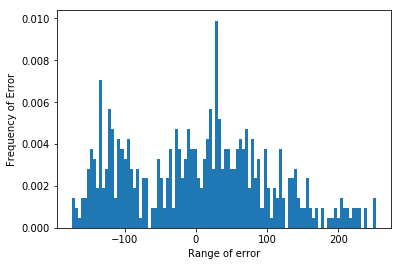

In [23]:
plt.hist(np.asarray(dataset['Error'], dtype='float'), bins=100, normed=True) #plot of frequency of errors vs range of errors.
plt.ylabel('Frequency of Error');
plt.xlabel('Range of error') #THese are the errors divided into bins of approx. equal sizes.

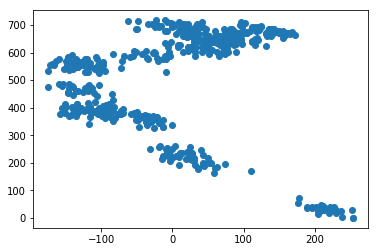

In [30]:
plt.scatter(dataset['Error'],dataset['y_pred'])

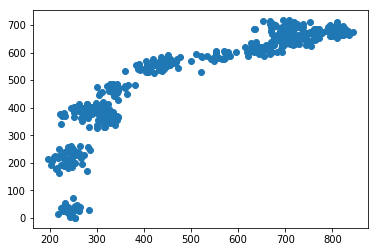

In [31]:
plt.scatter(dataset['dmf'],dataset['y_pred'])

In [36]:
X1 = df1_train[['flor','flor_1']]
y1 = df1_train['dmf']
clf.fit(X1,y1)
score = clf.score(X1,y1) #To calculate R Square value.
print (score)#THis also is a R square value.

y_pred1 = clf.predict(df1_test[['flor','flor_1']])

0.9245654238405404


In [54]:
result1=smf.ols(formula="dmf ~ flor + flor_1", data=df1).fit()
#print (result1.summary())

In [41]:
data1 = np.array([df1_test['dmf'],y_pred1,np.subtract(df1_test['dmf'],y_pred1)])
dataset1 = pd.DataFrame({'dmf':data1[0,:],'y_pred1':data1[1,:],'Error':data1[2,:]})

/home/abhishek/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Range of error')

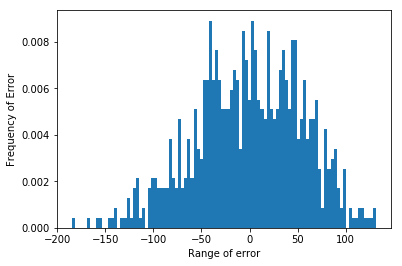

In [42]:
plt.hist(np.asarray(dataset1['Error'], dtype='float'), bins=100, normed=True) #plot of frequency of errors vs range of errors.
plt.ylabel('Frequency of Error');
plt.xlabel('Range of error') #THese are the errors divided into bins of approx. equal sizes.

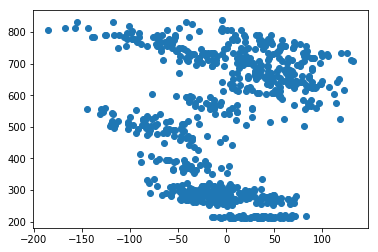

In [43]:
plt.scatter(dataset1['Error'],dataset1['y_pred1'])

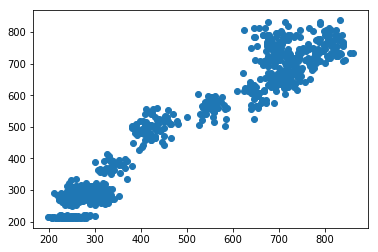

In [44]:
plt.scatter(dataset1['dmf'],dataset1['y_pred1'])

In [11]:
X2 = df2_train[['flor','flor_1','1/sqrt_flor']]
y2 = df2_train['dmf']
clf.fit(X2,y2)
score = clf.score(X2,y2) #To calculate R Square value.
print (score)#THis also is a R square value.

y_pred2 = clf.predict(df2_test[['flor','flor_1','1/sqrt_flor']])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [56]:
result2=smf.ols(formula="dmf ~ flor + flor_1 + sqrt_flor", data=df2).fit()
#print (result2.summary())

In [57]:
data2 = np.array([df2_test['dmf'],y_pred2,np.subtract(df2_test['dmf'],y_pred2)])
dataset2 = pd.DataFrame({'dmf':data2[0,:],'y_pred2':data2[1,:],'Error':data2[2,:]})

/home/abhishek/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Range of error')

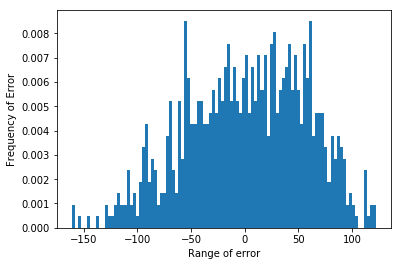

In [58]:
plt.hist(np.asarray(dataset2['Error'], dtype='float'), bins=100, normed=True) #plot of frequency of errors vs range of errors.
plt.ylabel('Frequency of Error');
plt.xlabel('Range of error') #THese are the errors divided into bins of approx. equal sizes.

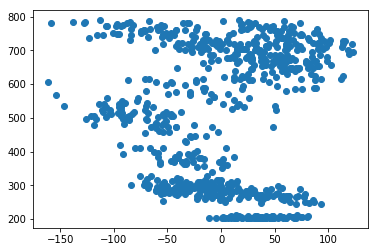

In [59]:
plt.scatter(dataset2['Error'],dataset2['y_pred2'])

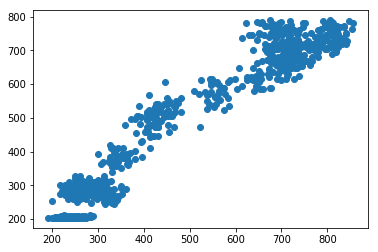

In [60]:
plt.scatter(dataset2['dmf'],dataset2['y_pred2'])